In [1]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import fft 

In [2]:
def wavenum(i, N) : return (i + N // 2) % N - N // 2

0j
0j
(1.019671694058937+0j)
(1.019671694058937+0j)
(2.7370714646743024+0j)
(2.7370714646743024+0j)
(2.8738434925734193+0j)
(2.8738434925734193+0j)
(1.1160452064469313+0j)
(1.1160452064469313+0j)
(-0.6316388418748577+0j)
(-0.6316388418748577+0j)
(-0.7730053739101194+0j)
(-0.7730053739101194+0j)
(0.15837116216651376+0j)
(0.15837116216651376+0j)
(0.5913164526666717+0j)
(0.5913164526666717+0j)
(0.07883400905995114+0j)
(0.07883400905995114+0j)
(-0.43182215434331533+0j)
(-0.43182215434331533+0j)
(-0.21114930032276663+0j)
(-0.21114930032276663+0j)
(0.2807557033892797+0j)
(0.2807557033892797+0j)
(0.2745605768301181+0j)
(0.2745605768301181+0j)
(-0.1416265073552645+0j)
(-0.1416265073552645+0j)
(-0.286249244475555+0j)
(-0.286249244475555+0j)
(0.021243488065232293+0j)
(0.021243488065232293+0j)
(0.2588548946588164+0j)
(0.2588548946588164+0j)
(0.07410643225353958+0j)
(0.07410643225353958+0j)
(-0.20407692089938154+0j)
(-0.20407692089938154+0j)
(-0.1402088141141224+0j)
(-0.1402088141141224+0j)
(-0.14

Text(0.5, 0, 'Frequency domain')

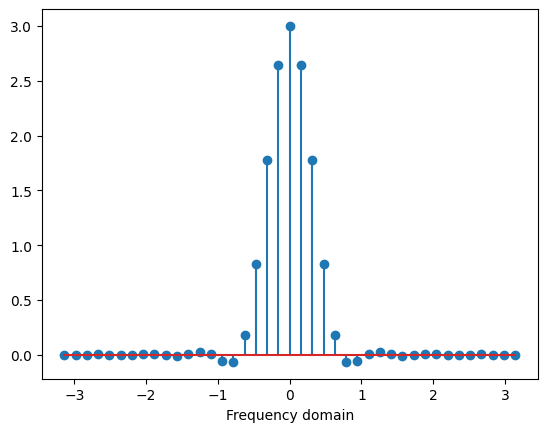

In [3]:
# Create filter.
filter_size = 41

M = 3
H = np.zeros(filter_size, dtype=complex)

for i in range(filter_size):
    k = wavenum(i, filter_size)
    a = 2 * np.pi / filter_size * k * M 
    
    #G_b, integral from -M to M of cos(t*pi/M) e^(-iwt)
    if a != np.pi / M or a != -(np.pi/M):
        H[i] += -(2 * M**2 * a * np.sin(M * a))/(M**2 * a**2 - np.pi**2)
        print(H[i])
    else:
        H[i] = M**3
    
    print(H[i])
    # G_a, integral from -M to M of e^(-iwt)
    if a != 0:
        H[i] += 2 * np.sin(M * a) / a
    else:
        H[i] = 2 * M
        

        
H /= 2.0
plt.stem(np.linspace(-np.pi, np.pi, filter_size),  np.fft.fftshift(H).real)
plt.xlabel("Frequency domain")

Text(0.5, 0, 'Time Domain')

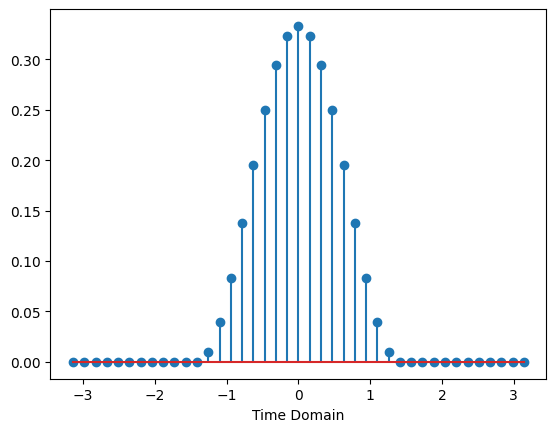

In [4]:
# Inverse Fourier Transform of the filter, fftshifted. TIME DOMAIN
h = np.fft.ifft(H)
plt.stem(np.linspace(-np.pi, np.pi, filter_size), np.fft.fftshift(h).real)
plt.xlabel("Time Domain")

Text(0.5, 0, 'Frequency domain')

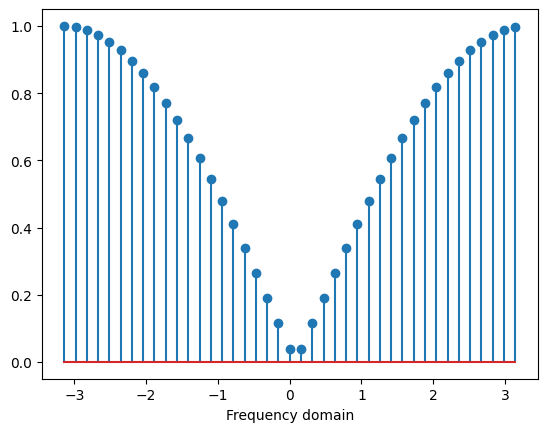

In [5]:
#Shift phase. Based on size of filter since it is that which we are shifting now.
SHIFT = 20.5
delta = SHIFT % 1
L = np.zeros(filter_size, dtype=complex)
for i in range(filter_size):
    L[i] = np.exp(-2j * np.pi * delta * wavenum(i,filter_size) /filter_size)
plt.stem(np.linspace(-np.pi, np.pi, filter_size), L.real)
plt.xlabel("Frequency domain")

(0.11026727835681119+0j)
(0.11026727835681119+0j)
(0.10366750951874937+0j)
(0.09126702037372902+0j)
(0.0745549774434925+0j)
(0.05555827425329577+0j)
(0.03654990657380061+0j)
(0.019853428589444885+0j)
(0.007424894112820893+0j)
(0.0008996738290251321+0j)
(-5.569315916452554e-05+0j)
(1.823925478004236e-05+0j)
(-8.466591959615223e-06+0j)
(4.77718126396018e-06+0j)
(-3.051469943457769e-06+0j)
(2.1284676851519175e-06+0j)
(-1.5902563885032011e-06+0j)
(1.2596368718419954e-06+0j)
(-1.052476104522631e-06+0j)
(9.257977690052728e-07+0j)
(-8.57068676162728e-07+0j)
(8.352653948822385e-07+0j)
(-8.570686761633225e-07+0j)
(9.257977690105961e-07+0j)
(-1.0524761045290451e-06+0j)
(1.2596368718428848e-06+0j)
(-1.5902563885058403e-06+0j)
(2.128467685154447e-06+0j)
(-3.0514699434615985e-06+0j)
(4.777181263961572e-06+0j)
(-8.466591959620633e-06+0j)
(1.8239254780042593e-05+0j)
(-5.569315916452078e-05+0j)
(0.000899673829025126+0j)
(0.007424894112820894+0j)
(0.01985342858944489+0j)
(0.036549906573800625+0j)
(0.05

Text(0.5, 0, 'Time domain')

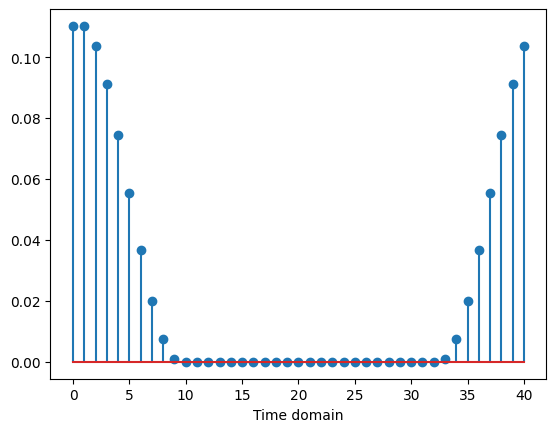

In [11]:
# Multiply filter by phase shift and do Inverse Fourier Transform.
z = np.fft.ifft(L * H)
z /= M
for i in range(filter_size):
    print(z[i])
plt.stem(np.arange(filter_size),z.real)
plt.xlabel("Time domain")

<StemContainer object of 3 artists>

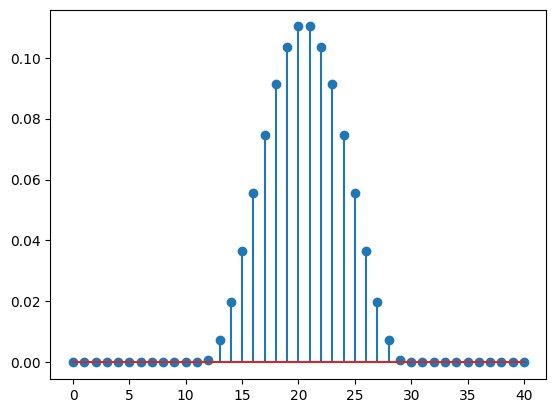

In [7]:
plt.stem(np.arange(filter_size), np.fft.fftshift(z).real)

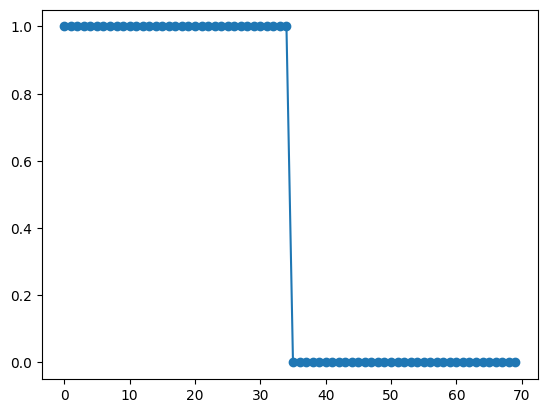

In [8]:
n = 70
x_o = np.arange(n)
xn = n * 0.5
x = x_o < xn
x = np.array(x)
plt.plot(x_o,x, marker ='o')

<StemContainer object of 3 artists>

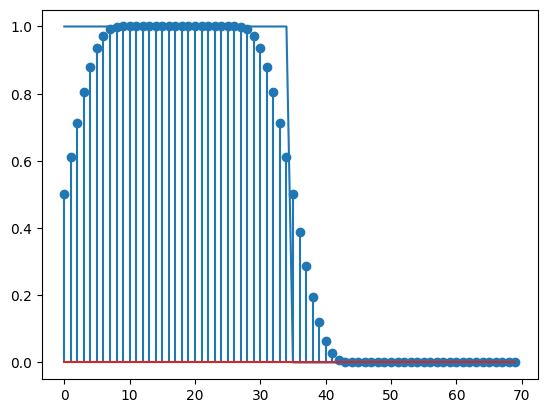

In [13]:
x_shifted_filter = np.zeros(n, dtype=complex)
x_shifted_filter = np.convolve(x,np.fft.fftshift(z), 'same')
plt.plot(x_o,x)
plt.stem(x_o,x_shifted_filter.real)

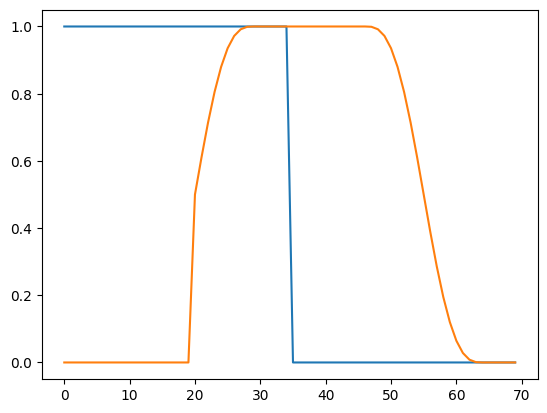

In [10]:
x_shifted = np.zeros(n, dtype=complex)
for i in range(n):
        new_index = (i + int(SHIFT)) % n
        x_shifted[new_index] = x_shifted_filter[i]
plt.plot(x_o,x)
plt.plot(x_o,x_shifted.real)